In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("."))  # Adds current directory to Python path



In [24]:
df = pd.read_csv('data/sample_inputs.csv')
df.head()


,site_name,wind_speed,wind_direction,particulate_level,humidity,timestamp
0,Site A,12.5,NW,85.2,60,2025-08-28 18:00
1,Site B,8.3,SE,70.1,55,2025-08-28 19:00


In [25]:
#from src/drift_model.py

from src.drift_model import train_model, make_predictions
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['wind_speed', 'humidity']]  # Add 'wind_angle' if you've created it
y = df['particulate_level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = train_model(X_train, y_train)
predictions = make_predictions(model, X_test)


In [26]:
from src.data_ingestion import load_data, preprocess_data

df = load_data('data/sample_inputs.csv')
df = preprocess_data(df)
df.head()


,site_name,wind_speed,wind_direction,particulate_level,humidity,timestamp,wind_angle
0,Site A,12.5,NW,85.2,60,2025-08-28 18:00,315
1,Site B,8.3,SE,70.1,55,2025-08-28 19:00,135


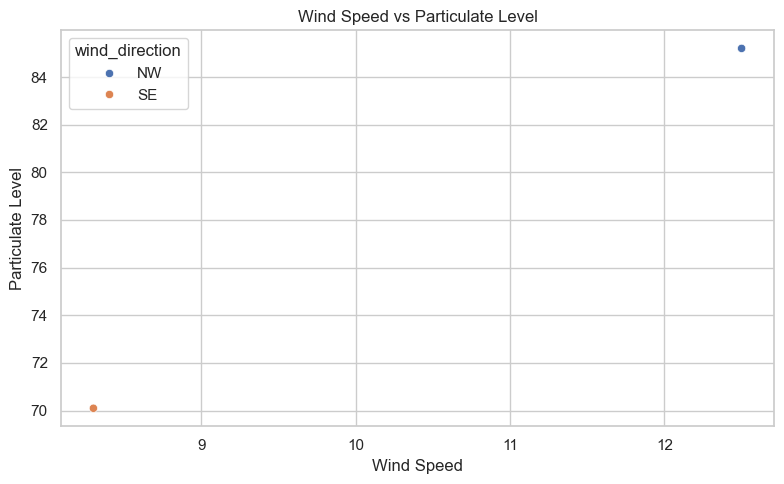

In [27]:
from src.Visualizer import plot_drift

plot_drift(df)
